In [1]:
# Uncomment this code if using YOLO for the first time
#!pip install ultralytics

In [83]:
from ultralytics import YOLO
import csv
import cv2

In [84]:
model = YOLO('yolov8n.pt')

#results = model.train(data='coco128.yaml', epochs=3)
#results = model.val()

#results = model('https://ultralytics.com/images/bus.jpg')
results = model('car_track.png')


image 1/1 /home/matteo/Projects/Intramotev/YOLOv8_picture/car_track.png: 384x640 1 train, 5.0ms
Speed: 1.4ms preprocess, 5.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


In [85]:
detected_objects = results[0].boxes
csv_file_name = 'detected_objects.csv'
object_names = results[0].names
with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(['Class ID', 'Object Name','Confidence', 'X1', 'Y1', 'X2', 'Y2'])

    for box in detected_objects:
        class_id = box.cls[0].item()
        conf = box.conf[0].item()
        cords = box.xyxy[0].tolist()  # formatted as [x1, y1, x2, y2]
        object_name = object_names.get(class_id, 'Unknown')
        
        # Write the object data to the CSV file
        writer.writerow([class_id, object_name, conf, *cords])

In [86]:
# calculate bottom of bounding box
bottom = cords[3]
print(cords)
print(bottom)

[524.7147216796875, 299.0667724609375, 1027.7330322265625, 448.28936767578125]
448.28936767578125


Image read successfully


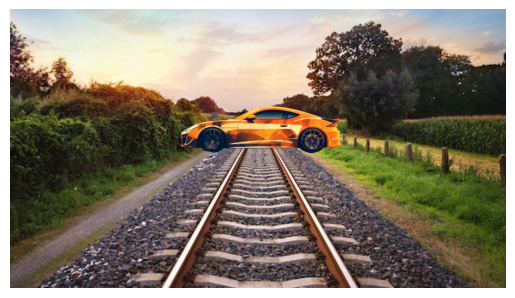

In [87]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('car_track.png')

# Check if the image was successfully read
if image is None:
    print("Error: Unable to read the image")
else:
    print("Image read successfully")

# Plot the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

In [88]:
# Line Detected with equation x = (y - 846) / -1.7313432835820894 + 479
# Line Detected with equation x = (y - 424) / 1.8091286307053942 + 814
import numpy as np

ylim = image.shape[0]
xlim = image.shape[1]

y = np.arange(ylim)

def calc_x1(y):
    return (y - 846) / -1.7313432835820894 + 479

def calc_x2(y):
    return (y - 424) / 1.8091286307053942 + 814

x1 = (y - 846) / -1.7313432835820894 + 479
x2 = (y - 424) / 1.8091286307053942 + 814

distance = calc_x2(bottom) - calc_x1(bottom)
print(distance)

118.71382812577235


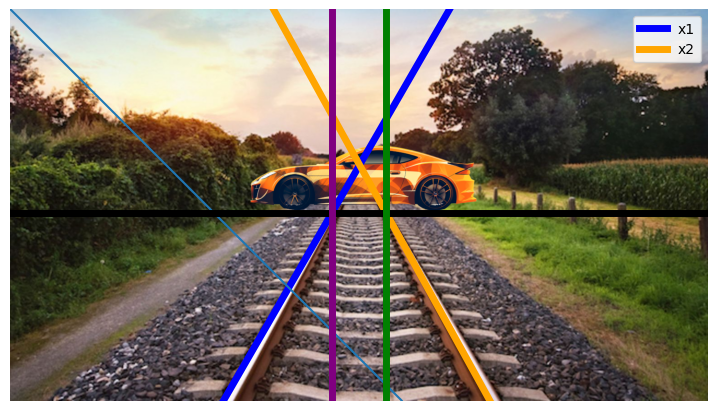

In [91]:
plt.figure(figsize = (9,16))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.plot(x1, y, linewidth = 5, color = 'blue', label = "x1")
plt.plot(x2, y, linewidth = 5, color = 'orange', label = "x2")

# this shows that it is plotting from top down
# plt.axhline(300, linewidth = 10, color = "red")
# plt.axhline(448, linewidth = 10, color = "green")
plt.axhline(bottom, linewidth = 5, color = 'black')
# plt.axhline(ylim, linewidth = 5, color = "gray")
# plt.axhline(0, linewidth = 10, color = "gray")

plt.axvline(calc_x1(bottom), linewidth = 5, color = "purple")
plt.axvline(calc_x2(bottom), linewidth = 5, color = "green")

plt.ylim(ylim,0)
plt.axis('off')  # Hide axes
plt.legend()
plt.show()


